<h2><font color="#004D7F" size=5>Módulo 3: Boosting</font></h2>


<h1><font color="#004D7F" size=6> 4. Light Gradient Boosted Machine</font></h1>
<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Aprendizaje Automático II</font><br>
<font color="#004D7F" size=3>Universidad Nacional de Educación a Distancia</font>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>


* [1. Algoritmo LightGBM](#section1)
    * [1.1. Instalar LightGBM](#section11)
* [2. LightGBM según el tipo de problema](#section2)
    * [2.1. LightGBM para Clasificación](#section21)
    * [2.2. LightGBM para Regresión](#section22)
* [3. Hiperparámetros de LightGBM](#section3)
   * [3.1. Número de árboles](#section31)
   * [3.2. Profundidad del árbol](#section32)
   * [3.3. Tasa de aprendizaje](#section33)
   * [3.4. Tipo de impulso](#section34)
* [Ejercicios](#sectionEj)

---

<a id="section0"></a>
# <font color="#004D7F">0. Contexto</font>

- Light Gradient Boosted Machine (LightGBM) amplía el algoritmo GBM agregando un tipo de selección automática de funciones y enfocándose en ejemplos de aumento con gradientes más grandes. 
- Esto puede dar como resultado una aceleración espectacular del entrenamiento y un mejor rendimiento predictivo.

En este tutorial, aprenderemos:
- LightGBM es una implementación eficiente de código abierto..
- Cómo desarrollar conjuntos LightGBM para clasificación y regresión con la API scikit-learn.
- Cómo explorar el efecto de los hiperparámetros del modelo LightGBM en el rendimiento del modelo.


---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Algoritmo Light Gradient Boosted Machine</font>

- Light Gradient Boosted Machine (LightGBM) se refiere al proyecto de código abierto, la biblioteca de software y el algoritmo. 
- LightGBM fue descrito por Guolin Ke, et al. en el artículo de 2017 titulado _LightGBM: A Highly Efficient Gradient Boosting Decision Tree_. La implementación introduce dos ideas clave: GOSS y EFB.

LightGBM incluye dos contribuciones principales:
1. El muestreo unilateral basado en gradientes (GOSS) es una modificación del método _gradient boosting_ que centra la atención en aquellos ejemplos de entrenamiento que dan como resultado un gradiente mayor, lo que a su vez acelera el aprendizaje y reduce la complejidad computacional del método.
2. La agrupación de características exclusivas (EFB) es un enfoque para agrupar características escasas de información (en su mayoría con valor cero) mutuamente excluyentes, e.g. variables realizadas con OH-E. Como tal, es un tipo de selección automática de funciones.
  
<figure><center>
  <img src="data/lightGBM.png" width="450" height="450" alt="Gráfica">
  <figcaption><blockquote>XGBoost vs. LightGBM. Extraída de <a href="https://www.linkedin.com/pulse/xgboost-vs-lightgbm-ashik-kumar/">XGBoost vs. LightGBM</a></blockquote></figcaption>
</center></figure>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Acceso al artículo científico [_LightGBM: A Highly Efficient Gradient Boosting Decision Tree_](https://dl.acm.org/doi/abs/10.5555/3294996.3295074)
</div>

<a id="section11"></a> 
## <font color="#004D7F"> 1.1. Instalar LightGBM</font>

El primer paso es instalar la biblioteca LightGBM

In [2]:
!pip install lightgbm==4.3

In [5]:
# check lightgbm library version
import lightgbm
print(lightgbm.__version__)

3.1.1


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la librería [`LightGBM`](https://lightgbm.readthedocs.io/en/stable/)
</div>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la librería [`LightGBM en Python`](https://lightgbm.readthedocs.io/en/stable/Python-Intro.html)
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section2"></a> 
# <font color="#004D7F"> 2. LightGBM según el tipo de problema</font>

La biblioteca LightGBM tiene su propia API personalizada, aunque usaremos el método a través de las clases contenedoras de scikit-learn: `LGBMRegressor` y `LGBMClassifier`. 

Al ajustar un modelo final, puede ser deseable aumentar el número de árboles hasta que la varianza del modelo se reduzca en evaluaciones repetidas, o ajustar múltiples modelos finales y promediar sus predicciones. 

<a id="section21"></a> 
## <font color="#004D7F"> 2.1. LightGBM para Clasificación</font>

En esta sección, veremos el uso de LightGBM para un problema de clasificación.

<a id="section211"></a> 
### <font color="#004D7F"> 2.1.1. Dataset</font>

Primero, podemos usar la función `make_classification()` para crear un problema de clasificación binaria sintética con 1000 ejemplos y 20 características de entrada.

In [6]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
print(X.shape, y.shape)

(1000, 20) (1000,)


<a id="section212"></a> 
### <font color="#004D7F"> 2.1.2. Evaluación</font>

Evaluaremos el modelo utilizando una validación cruzada estratificada repetida de _k_ veces, con 3 repeticiones y 10 veces.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`LGBMClassifier`](https://lightgbm.readthedocs.io/en/stable/pythonapi/lightgbm.LGBMClassifier.html)
</div>

In [7]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from lightgbm import LGBMClassifier

model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.909 (0.025)


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section22"></a> 
## <font color="#004D7F"> 2.2. LightGBM para Regresión</font>

En esta sección, veremos el uso de LightGBM para un problema de regresión. 

<a id="section221"></a> 
### <font color="#004D7F"> 2.2.1. Dataset</font>

Primero, podemos usar la función `make_regression()` para crear un problema de regresión sintética con 1000 ejemplos y 20 características de entrada.

In [8]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
print(X.shape, y.shape)

(1000, 20) (1000,)


<a id="section222"></a> 
### <font color="#004D7F"> 2.2.2. Evaluación</font>

Evaluaremos el modelo mediante validación cruzada estratificada repetida de _k_ veces, con 3 repeticiones y 10 pliegues. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Más información sobre la clase [`LGBMRegressor`](https://lightgbm.readthedocs.io/en/stable/pythonapi/lightgbm.LGBMRegressor.html)
</div>

In [9]:
from sklearn.model_selection import RepeatedKFold
from lightgbm import LGBMRegressor

X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=7)
model = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -60.004 (2.887)


En este caso, podemos ver que el conjunto LightGBM con hiperparámetros predeterminados logra un MAE de aproximadamente 60.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: La API de scikit-learn invierte el signo del MAE para transformarlo, de minimizar el error a maximizar el error negativo. Esto significa que los errores positivos de gran magnitud se convierten en grandes errores negativos (por ejemplo, 100 se convierte en -100) y un modelo perfecto no tiene ningún error con un valor de 0,0. También significa que podemos ignorar con seguridad el signo de las puntuaciones MAE medias. 

</div>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<a id="section3"></a> 
# <font color="#004D7F"> 3. Hiperparámetros de LightGBM</font>

En esta sección, analizaremos más de cerca algunos de los hiperparámetros que debería considerar ajustar para el conjunto LightGBM y su efecto en el rendimiento del modelo.

<a id="section31"></a> 
## <font color="#004D7F"> 3.1. Número de árboles</font>

- Los árboles de decisión se agregan al modelo secuencialmente en un esfuerzo por corregir y mejorar las predicciones hechas por árboles anteriores.
- Por eso, cuantos más árboles haya, mejor será.
- El número de árboles se puede establecer mediante el argumento `n_estimators` (por defecto es 100). 

In [10]:
from matplotlib import pyplot

def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y
    
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [11]:
def get_models():
	models = dict()
	# definir el número de árboles [10, 50, 100, 500, 1000]
	trees = [10, 50, 100, 500, 1000]
	for t in trees:
		models[str(t)] = LGBMClassifier(n_estimators=t)
	return models

In [12]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>10 0.859 (0.031)
>50 0.913 (0.027)
>100 0.930 (0.027)
>500 0.940 (0.027)
>1000 0.941 (0.028)


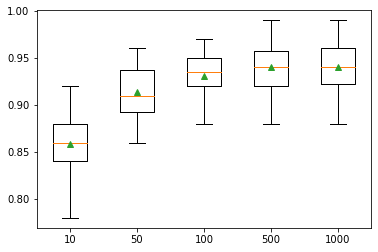

In [13]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section32"></a> 
## <font color="#004D7F"> 3.2. Profundidad del árbol</font>

- La profundidad del árbol controla qué tan especializado está cada árbol en train (qué tan general o sobreajustado).
- Se prefieren árboles que no sean demasiado superficiales y generales (como AdaBoost) ni demasiado profundos y especializados (como Bootstrap Aggregation).
- GBM generalmente funciona bien con árboles que tienen una profundidad modesta, encontrando un equilibrio entre habilidad y generalidad. 
- La profundidad del árbol se controla mediante el argumento `max_depth` (por defecto es 6).
- Hay dos formas principales de controlar la complejidad de los árboles: La profundidad máxima de los árboles y el número máximo de nodos terminales (hojas) en el árbol. 
- Estamos explorando la cantidad de hojas, por lo que necesitamos aumentar la cantidad de hojas para soportar árboles más profundos estableciendo el argumento `num_leaves`. 

In [16]:
def get_models():
	models = dict()
	# Explorar la profundidad de 1 a 10
	for i in range(1, 11):
		models[str(i)] = LGBMClassifier(max_depth=i, num_leaves=2**i)
	return models

In [17]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.832 (0.028)
>2 0.873 (0.030)
>3 0.898 (0.031)
>4 0.911 (0.033)
>5 0.923 (0.028)
>6 0.922 (0.025)
>7 0.926 (0.031)
>8 0.928 (0.027)
>9 0.929 (0.032)
>10 0.926 (0.028)


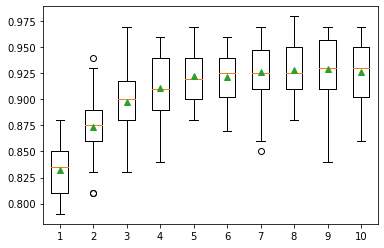

In [18]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section33"></a> 
## <font color="#004D7F"> 3.3. Tasa de aprendizaje</font>

- La tasa de aprendizaje controla la cantidad de contribución que cada modelo tiene en la predicción del conjunto.
- Tasas más pequeñas pueden requerir más árboles de decisión en el conjunto. 
- Se establece mediante el argumento `learning_rate` (por defecto es 0,1). 

In [19]:
def get_models():
	models = dict()
	# explorar las siguientes tasas [0.0001, 0.001, 0.01, 0.1, 1.0]
	rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
	for r in rates:
		key = '%.4f' % r
		models[key] = LGBMClassifier(learning_rate=r)
	return models

In [20]:
X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>0.0001 0.800 (0.038)
>0.0010 0.811 (0.035)
>0.0100 0.859 (0.035)
>0.1000 0.930 (0.027)
>1.0000 0.929 (0.030)


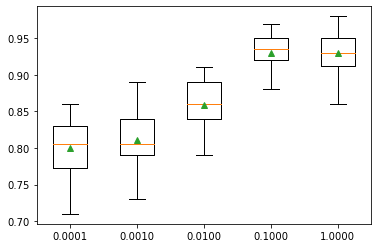

In [23]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

<a id="section34"></a> 
## <font color="#004D7F"> 3.4. Tipo de impulso</font>

- Una característica de LightGBM es que admite varios algoritmos de boosting diferentes.
- Se especifica mediante el argumento `boosting_type` e incluye:
    - `gbdt`: Gradient Boosting Decision Tree (GDBT). Es el algoritmo clásico (y predeterminado) de aumento de gradiente. 
    - `dart`: Dropouts meet Multiple Additive Regression Trees (DART). Se describe en el artículo de 2015 titulado _DART: Dropouts meet Multiple Additive Regression Trees_ y agrega el concepto de dropout del aprendizaje profundo al algoritmo de árboles de regresión aditiva múltiple (MART)
    - `goss`: Gradient-based One-Side Sampling (GOSS). El enfoque busca utilizar únicamente instancias que resulten en un gran gradiente de error para actualizar el modelo y descartar el resto.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Acceso al artículo científico [_DART: Dropouts meet Multiple Additive Regression Trees_](https://proceedings.mlr.press/v38/korlakaivinayak15.html)
</div>

In [24]:
def get_models():
	models = dict()
	# explorar los tres impulsos
	impulses = ['gbdt', 'dart', 'goss']
	for i in impulses:
		models[i] = LGBMClassifier(boosting_type=i)
	return models

X, y = get_dataset()
models = get_models()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>gbdt 0.930 (0.027)
>dart 0.914 (0.029)
>goss 0.918 (0.028)


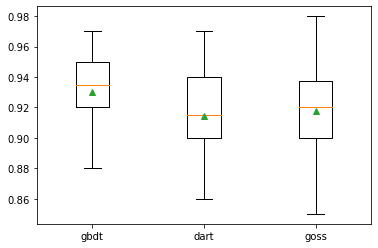

In [25]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Sus resultados pueden variar dada la naturaleza estocástica del algoritmo o procedimiento de evaluación, o diferencias en la precisión numérica. Considere ejecutar el ejemplo varias veces y comparar el resultado promedio.
</div>

---
<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---